In [1]:
# 주요 import
import numpy as np
import pandas as pd

# 주피터 셸에서 모두 출력하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Bitly의 USA.gov 데이터

2011년 URL 축약 서비스인 Bitly는 미국 정부 웹사이트인 USA.gov와 제휴해 .gov나 .mil로 끝나는 URL을 축약한 사용자에 관한 익명 정보를 제공했었다.

2011년에는 실시간 피드뿐 아니라 매시간마다 스냅숏을 텍스트 파일로 내려받을 수 있었다.

시간별 스냅숏 파일의 각 행은 웹 데이터 형식으로 흔히 사용하는 JSON 형식이다.

In [30]:
path = "example.txt"
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



`json 모듈`의 `loads 함수`를 이용해서 내려받은 샘플 파일을 한 줄씩 읽을 수 있다.

결과를 담고 있는 records 객체는 파이썬 딕셔너리의 리스트이다.

In [31]:
import json
with open(path, encoding='UTF8') as f:
    records = [json.loads(line) for line in f]

In [32]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## 순수 파이썬으로 표준 시간대 계산하기

가장 빈도가 높은 표준 시간대를 구할 때, 다양한 방법이 있지만 리스트 표현법을 사용해 표준 시간대 목록을 가져와보자.

In [33]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

모든 records가 표준 시간대 필드를 가지고 있는 건 아니다.

리스트 표기법 뒤에 `if "tz" in rec`를 추가해 tz 필드가 있는지 검사해보면 이 문제를 해결할 수 있다.

In [34]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

비어 있는 필드를 제거할 수도 있지만 그냥 두고, 표준 시간대를 반복하면서 딕셔너리를 사용해 수(counts)를 저장해보자.

In [35]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

파이썬 표준 라이브러리의 고급 도구를 사용하면 좀 더 간단하게 작성할 수 있다.

In [36]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)    # 값이 0으로 초기화
    for x in sequence:
        counts[x] += 1
    return counts

재사용하기 쉽도록 이 로직을 함수로 만들고 time_zones 리스트를 함수에 넘겨서 사용해보자.

In [37]:
counts = get_counts(time_zones)
counts["America/New_York"]

len(time_zones)

1251

3440

가장 많이 등장하는 상위 10개의 표준 시간대를 알고 싶으면 튜플 리스트를 (count, tz)로 만들고 정렬하면 된다.

In [38]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [39]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

파이썬 표준 라이브러리의 `collections.Counter 클래스`를 이용하면 지금까지 했던 작업을 훨씬 쉽게 할 수 있다.

In [40]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 판다스로 표준 시간대 계산하기

frame의 출력 결과는 거대한 DataFrame 객체의 요약 정보이다.

In [41]:
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


`frame.info() 함수`를 이용하면 새로운 DataFrame의 열 이름, 추론된 열 자료형, 누락된 값 개수 같은 다양한 정보를 확인할 수 있다.

In [42]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [43]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [44]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

records에서 비어 있던 표준 시간대를 fillna 메서드로 누락된 값을 대체하고 불리언 배열 색인으로 빈 문자열을 찾아보자.

In [45]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"

tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

시본 패키지를 사용해서 수평 막대그래프를 그려보자.

<Axes: ylabel='tz'>

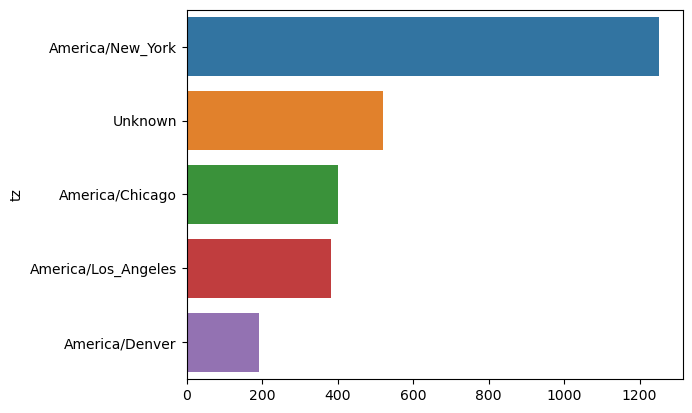

In [46]:
import seaborn as sns

subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 애플리케이션에 대한 정보가 들어 있다.

In [47]:
frame["a"][1]

frame["a"][50]

frame["a"][51][:50]    # 긴 문자열

'GoogleMaps/RochesterNY'

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

문자열을 분석하는 한 가지 전략은 문자열의 첫 번째 토큰을 브라우저 종류를 파악할 수 있을 만큼 잘라서 사용자 행동에 대한 또 다른 개요를 만드는 것이다.

In [48]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head()

results.value_counts().head(8)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

표준 시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나눠보자.

In [49]:
cframe = frame[frame["a"].notna()].copy()    # 결측값이 없는 복사본

cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

데이터를 표준 시간대와 운영제제 기준을 묶어보자.

In [50]:
by_tz_os = cframe.groupby(["tz", "os"])

value_counts 함수처럼 그룹별 합계는 `size 함수`를 이용해서 계산한다.

결과에 `unstack 함수`를 적용하면 표로 재배치된다.

In [56]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


`agg_sounts.sum("columns")`를 이용해 행 개수를 계산한 후, `argsort()`를 호출해 오름차순으로 정렬하는 데 사용할 색인 배열을 구한다.

In [58]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

agg_counts에 take를 사용해서 정렬된 순서 그대로 행을 선택하고 마지막 10개 행만 잘라낸다.

In [59]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


판다스에는 이와 똑같은 작업을 수행하는 `nlargest`라는 편리한 메서드가 있다.

In [60]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

윈도우 사용자와 비윈도우 사용자 숫자를 비교하기 위해 시본의 barplot 함수를 사용해 그룹별 막대그래프를 그려보자.

In [61]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


<Axes: xlabel='total', ylabel='tz'>

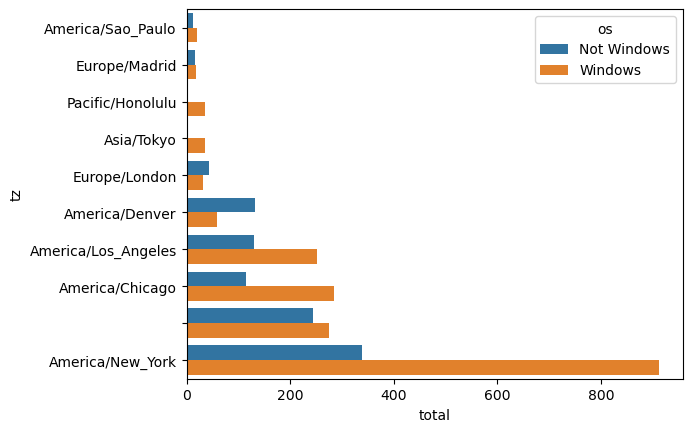

In [62]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

작은 그룹의 윈도우 사용자 비율을 확인하기 어려우므로, 각 행에서 총합을 1로 정규화한 뒤 그래프를 그려보자.

In [63]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)
results

tz           os  total  normed_total
tz                                                                           
                    16                       Not Windows  245.0      0.470250
                    17                           Windows  276.0      0.529750
America/Chicago     14      America/Chicago  Not Windows  115.0      0.287500
                    15      America/Chicago      Windows  285.0      0.712500
America/Denver      10       America/Denver  Not Windows  132.0      0.691099
                    11       America/Denver      Windows   59.0      0.308901
America/Los_Angeles 12  America/Los_Angeles  Not Windows  130.0      0.340314
                    13  America/Los_Angeles      Windows  252.0      0.659686
America/New_York    18     America/New_York  Not Windows  339.0      0.270983
                    19     America/New_York      Windows  912.0      0.729017
America/Sao_Paulo   0     America/Sao_Paulo  Not Windows   13.0      0.393939
                    1     America/Sao_Paulo      Windows   20.0      0.606061
Asia/Tokyo          6            Asia/Tokyo  Not Windows    2.0      0.054054
                    7            Asia/Tokyo      Windows   35.0      0.945946
Europe/London       8         Europe/London  Not Windows   43.0      0.581081
                    9         Europe/London      Windows   31.0      0.418919
Europe/Madrid       2         Europe/Madrid  Not Windows   16.0      0.457143
                    3         Europe/Madrid      Windows   19.0      0.542857
Pacific/Honolulu    4      Pacific/Honolulu  Not Windows    0.0      0.000000
                    5      Pacific/Honolulu      Windows   36.0      1.000000

<Axes: xlabel='normed_total', ylabel='tz'>

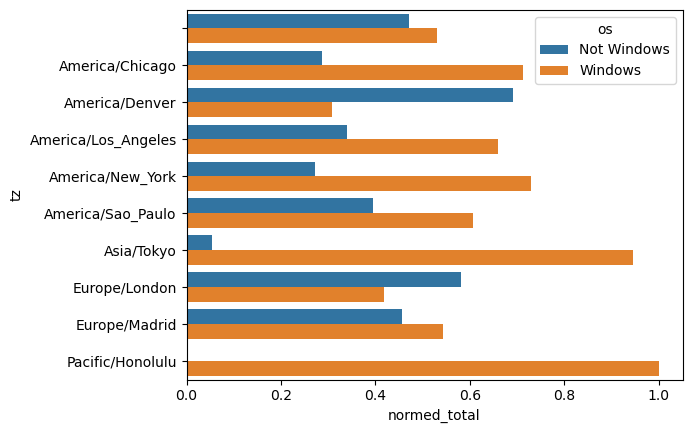

In [64]:
# 정규화한 데이터 그래프
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

# 무비렌즈의 영화 평점 데이터

그룹렌즈 리서치는 1990년대 말부터 2000년대 초까지 무비렌즈 사용자에게 수집한 방대한 영화 평점 데이터를 제공한다.

데이터에는 영화 평점과 영화에 대한 정보(장르, 개봉 연도), 사용자에 대한 정보(나이, 우편번호, 성별, 직업)까지 포함되어있다.

In [100]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
                       header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [101]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [102]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [103]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [104]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


판다스의 `merge 함수`를 이용해서 ratings 테이블과 uers 테이블을 병합하고, 그 결과를 movies 다시 테이블과 병합해보자. (중복되는 열 이름을 키로 사용)

In [105]:
data = pd.merge(pd.merge(ratings, users), movies)
data

data.iloc[0]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

성별에 따른 각 영화의 평균 평점을 구하기위해 pivot_table 메서드를 사용해보자.

pivot_table의 기본 구성요소에는 행 인덱스, 열 인덱스, 데이터 값,  데이터 집계 함수가 있다.

In [106]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


=> 매 행마다 성별에 따른 평균 영화 평점 정보를 담고 있는 DataFrame 객체가 생성

250건 이상의 평점 정보가 있는 영화만 찾아보자.

In [107]:
# 제목별 평점 정보 건수 확인
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [108]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

250건 이상의 평점 정보가 있는 영화에 대해 색인해보자.

In [109]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


여성에게 높은 평점을 받은 영화 목록을 확인해보자.

In [110]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


## 평점 차이 구하기

남녀 간의 호불호가 갈리는 영화를 평균 평점의 차이를 이용해서 찾아보자.

In [111]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

diff로 여성이 선호하는 영화 순서대로 정렬한다.

In [112]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


역순으로 정렬한 다음 상위 10개의 행을 잘라내면 남성이 선호하는 영화를 확인할 수 있다.

In [113]:
sorted_by_diff[::-1].head(10)

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


성별에 관계없이 영화에 대한 호불호가 극명하게 나뉘는 영화를 평점의 분산이나 표준편차를 이용해서 확인해보자.

In [114]:
rating_std_by_title = data.groupby("title")['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

내림차순으로 정렬해서 상위 10개 행을 선택하면 호불호가 극명하게 갈리는 영화 10개를 확인할 수 있다.

In [115]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

영화 장르에 따라 평점을 그룹화해보자. (str.split 메서드를 사용해 장르 문자열을 리스트로 분리 후 explode 메서드 사용)

In [116]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [117]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [118]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


movies.explode("genre")를 호출해서 각 영화 장르별로 하나의 행을 갖는 새로운 DataFrame을 생성해보자.

In [119]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


세 테이블을 모두 병합하고 장르별로 그룹화해보자.

In [120]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [123]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


# 13.3 신생아 이름

In [7]:
names1880 = pd.read_csv("names/yob1880.txt", names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [6]:
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [12]:
pieces = []
for year in range(1880, 2023):
    path = f"names/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    
    # 연도를 담을 열 추가
    frame["year"] = year
    pieces.append(frame)
    
# 하나의 DataFrame으로 모두 합치기
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [13]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


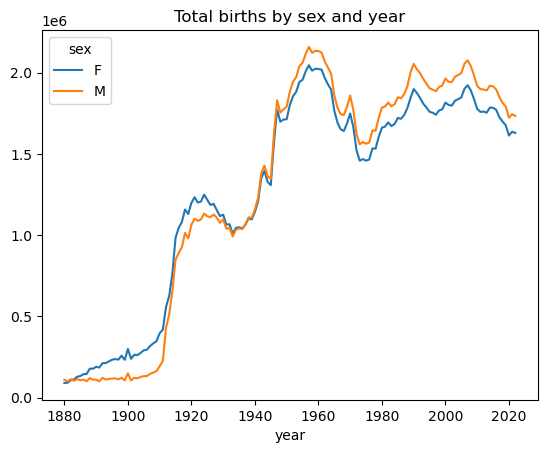

In [15]:
total_births.plot(title="Total births by sex and year");

In [19]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group

names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [21]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [24]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [27]:
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


## 13.3.1 이름 유행 분석 

In [28]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [33]:
total_births = top1000.pivot_table("births", index="year",
                                  columns="name", aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


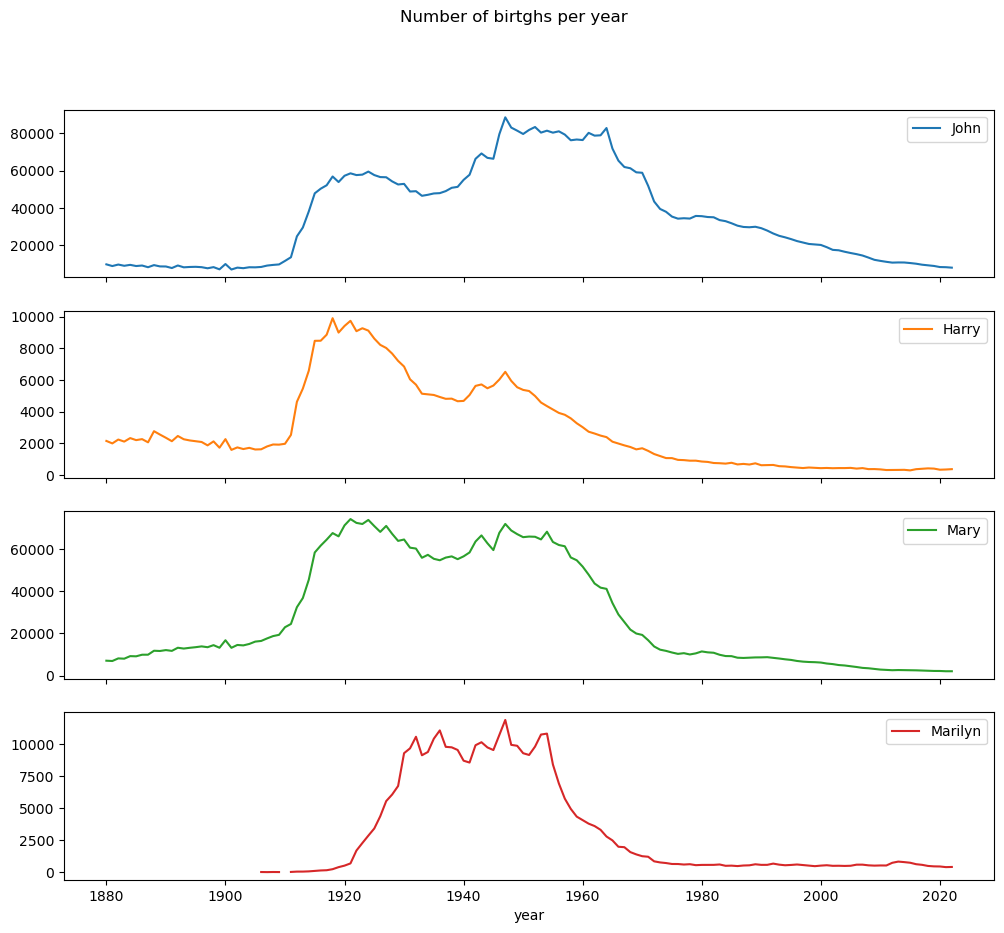

In [31]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of birtghs per year");

### 이름의 다양성 증가

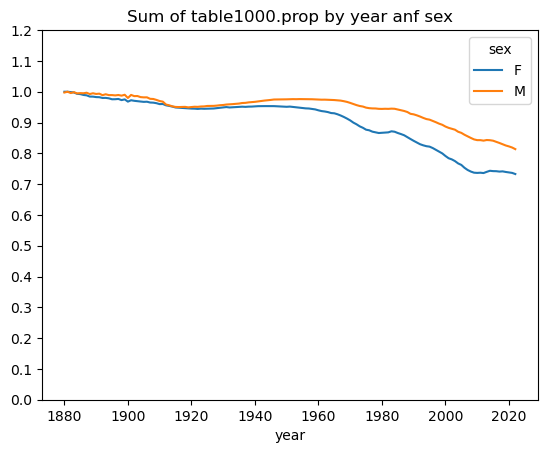

In [36]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year anf sex",
           yticks=np.linspace(0, 1.2, 13));

In [37]:
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22144,2010,0.011547
260877,Ethan,M,18011,2010,0.009392
260878,Michael,M,17374,2010,0.009059
260879,Jayden,M,17192,2010,0.008964
260880,William,M,17064,2010,0.008898
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [39]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum
prop_cumsum.searchsorted(0.5)

260876    0.011547
260877    0.020938
260878    0.029998
260879    0.038962
260880    0.047860
            ...   
261871    0.842390
261872    0.842492
261873    0.842594
261874    0.842696
261875    0.842798
Name: prop, Length: 1000, dtype: float64

116

In [41]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [45]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


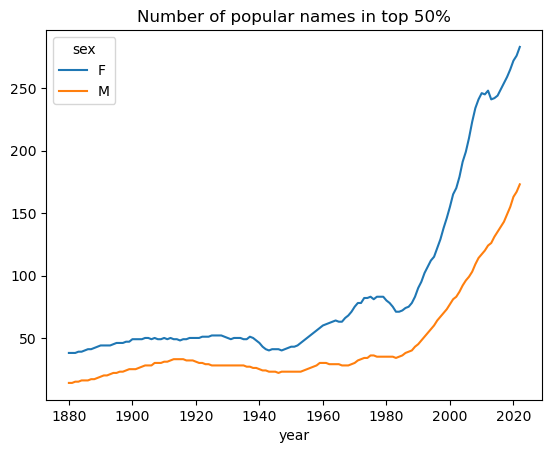

In [46]:
diversity.plot(title="Number of popular names in top 50%");

### 마지막 글자의 변화

In [48]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [49]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [50]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [51]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000156  0.000377  0.002260  0.009488  0.001406
h            0.051531  0.036220  0.076011  0.045564  0.037914  0.051828
i            0.001526  0.039965  0.031700  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000356  0.036579  0.049374  0.018531
l            0.043188  0.033871  0.026391  0.065023  0.104888  0.070455
m            0.001200  0.008611  0.002599  0.058046  0.033832  0.024707
n            0.079238  0.130680  0.140044  0.143387  0.152510  0.362404
o            0.001672  0.002440  0.001247  0.017064  0.012840  0.042558
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031050  0.087390
s            0.039036  0.012762  0.013336  0.130797  0.102699  0.065160
t            0.027432  0.015197  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000574  0.000416  0.000124  0.000057  0.001227
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007706  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116753  0.077345  0.161011  0.058207
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

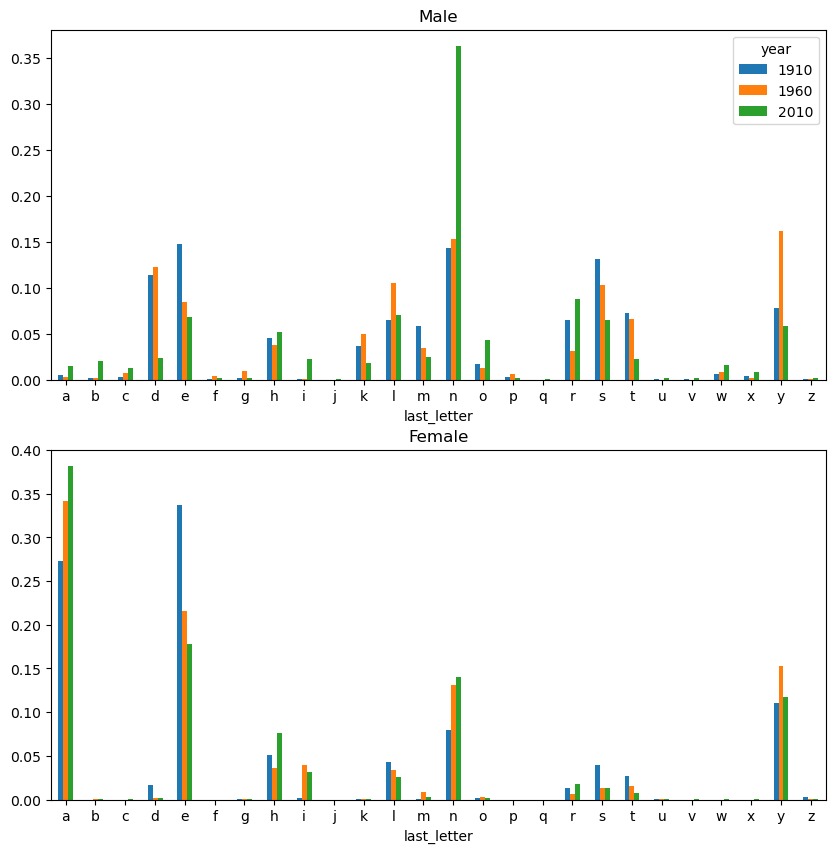

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 10));
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male");
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False);

In [54]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


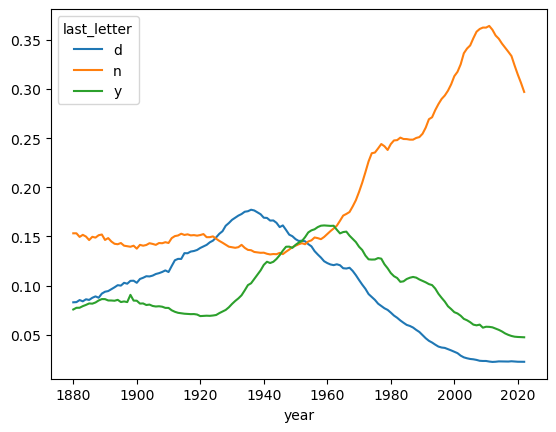

In [55]:
dny_ts.plot();

### 남자 이름과 여자 이름이 서로 바뀐 경우

In [56]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [57]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: births, dtype: int64

In [58]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN
2022,1.0,NaN


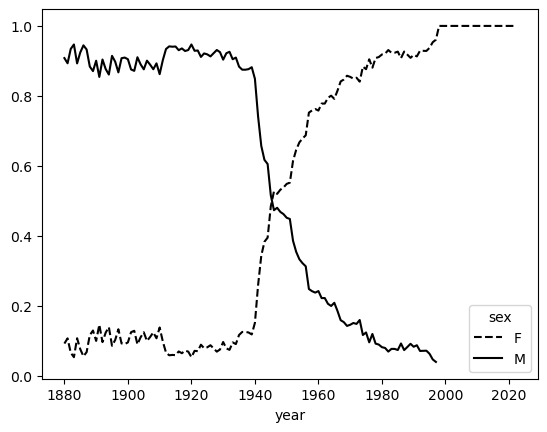

In [60]:
table.plot(style={"M": "k-", "F": "k--"});

# 13.4 미국 농무부 영양소 정보

In [2]:
import json

db = json.load(open("database.json"))
len(db)

6636

In [4]:
db[0].keys()
db[0]["nutrients"][0]

nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
